# 부트스트래핑과 0.632규칙

In [1]:
import numpy as np

N = 1000000 # 
bootstrap = np.random.choice(N, N, replace=True) 
np.round(len(set(bootstrap))/N, 3) 

0.632

In [2]:
np.exp(-1), 1-np.exp(-1)

(0.36787944117144233, 0.6321205588285577)

In [3]:
N = 10000 # 
result = []
for i in np.linspace(1, N, num=100):
    bootstrap = np.random.choice(int(i), int(i), replace=True) 
    result.append(np.round(len(set(bootstrap))/int(i), 3))

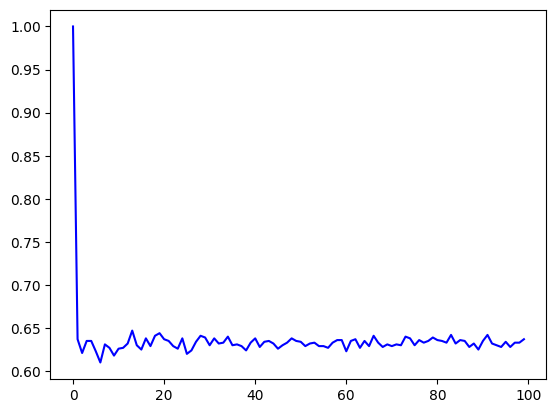

In [4]:
import matplotlib.pyplot as plt

plt.plot(result, 'b-')
plt.show()

# 배깅

In [5]:
import pandas as pd

In [6]:
wine_df = pd.read_csv("https://archive.ics.uci.edu"
                      "/ml/machine-learning-databases/wine/wine.data", 
                      header=None)

In [7]:
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [9]:
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
wine_df = wine_df[wine_df['Class label'] != 1]
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


In [11]:
X = wine_df[["Alcohol", "Hue"]].values
y = wine_df["Class label"].values

In [12]:
X.shape, y.shape

((119, 2), (119,))

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [15]:
train_y, test_y

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0], dtype=int64),
 array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1], dtype=int64))

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)

In [17]:
tree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [18]:
tree.score(test_X, test_y)

0.8333333333333334

In [19]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=tree, n_estimators=500, bootstrap=True, 
                        bootstrap_features=False, random_state=1)

In [20]:
bag.fit(train_X, train_y)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   random_state=1),
                  n_estimators=500, random_state=1)

In [21]:
bag.score(test_X, test_y)

0.8958333333333334

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [23]:
rf.fit(train_X, train_y)

RandomForestClassifier()

In [24]:
rf.score(test_X, test_y)

0.9166666666666666

In [25]:
import numpy as np

x_min, x_max = train_X[:,0].min()-1, train_X[:,0].max()+1
y_min, y_max = train_X[:,1].min()-1, train_X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1))

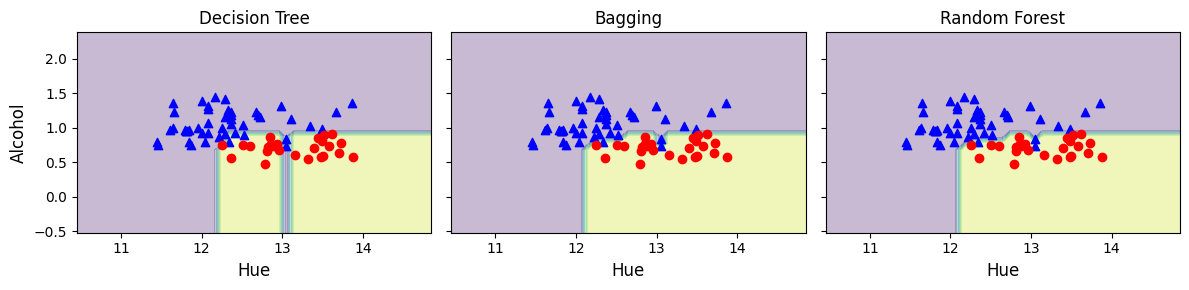

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row',
                         figsize=(12,3))

model_info = zip([0, 1, 2], 
                 [tree, bag, rf], 
                 ['Decision Tree', 'Bagging', 'Random Forest'])
for idx, model, title_txt in model_info :
    model.fit(train_X, train_y)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.3)
    axes[idx].scatter(train_X[train_y==0, 0], train_X[train_y==0, 1], 
                      c='blue', marker='^')
    axes[idx].scatter(train_X[train_y==1, 0], train_X[train_y==1, 1], 
                      c='red', marker='o')
    axes[idx].set_title(title_txt)
    axes[idx].set_xlabel('Hue', fontsize=12)
    
axes[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.show()

# 부스팅

In [27]:
import pandas as pd

In [28]:
wine_df = pd.read_csv("https://archive.ics.uci.edu"
                      "/ml/machine-learning-databases/wine/wine.data", 
                      header=None)

In [29]:
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [31]:
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
wine_df = wine_df[wine_df['Class label'] != 1]
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


In [33]:
X = wine_df[["Alcohol", "Hue"]].values
y = wine_df["Class label"].values

In [34]:
X.shape, y.shape

((119, 2), (119,))

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [37]:
train_y, test_y

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0], dtype=int64),
 array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1], dtype=int64))

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)

In [39]:
tree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [40]:
tree.score(test_X, test_y)

0.8333333333333334

In [41]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=tree, n_estimators=500, bootstrap=True, 
                        bootstrap_features=False, random_state=1)

In [42]:
bag.fit(train_X, train_y)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   random_state=1),
                  n_estimators=500, random_state=1)

In [43]:
bag.score(test_X, test_y)

0.8958333333333334

In [44]:
from sklearn.ensemble import AdaBoostClassifier
abm = AdaBoostClassifier(estimator=tree, n_estimators=500, random_state=1)

In [45]:
abm.fit(train_X, train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    random_state=1),
                   n_estimators=500, random_state=1)

In [46]:
abm.score(test_X, test_y)

0.8333333333333334

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=500, random_state=1)

In [48]:
gbm.fit(train_X, train_y)

GradientBoostingClassifier(n_estimators=500, random_state=1)

In [49]:
gbm.score(test_X, test_y)

0.875

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [51]:
xgb.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [52]:
xgb.score(test_X, test_y)

0.8541666666666666

In [53]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(train_X, train_y)

LGBMClassifier(verbose=-1)

In [54]:
lgbm.score(test_X, test_y)

0.8958333333333334

In [55]:
from sklearn.model_selection import GridSearchCV
xgb_param_grid = {'max_depth': [3,5,7,9],
                  'subsample': [0.4, 0.6, 0.8, 1.0]}
grid = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid,
                    scoring='roc_auc', n_jobs=-1, cv=5,
                    refit=True, return_train_score=True)

In [56]:
grid.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'subsample': [0.4, 0.6, 0.8, 1.0]},
             return_train_score=True, scoring='roc_auc')

In [57]:
import pandas as pd
grid_df = pd.DataFrame(grid.cv_results_)

In [58]:
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018516,0.000566,0.003185,0.000194,3,0.4,"{'max_depth': 3, 'subsample': 0.4}",0.98,0.977778,1.0,...,0.967111,0.029993,9,0.988889,0.986486,0.986486,0.986486,0.991892,0.988048,0.002135
1,0.021957,0.005341,0.003601,0.000800,3,0.6,"{'max_depth': 3, 'subsample': 0.6}",0.98,1.000000,1.0,...,0.976000,0.033301,1,0.997222,0.987838,0.997297,0.995946,1.000000,0.995661,0.004129
2,0.017580,0.001849,0.003273,0.000385,3,0.8,"{'max_depth': 3, 'subsample': 0.8}",0.98,1.000000,1.0,...,0.976000,0.033301,1,1.000000,0.993243,1.000000,0.998649,1.000000,0.998378,0.002620
3,0.015736,0.000719,0.003270,0.000543,3,1.0,"{'max_depth': 3, 'subsample': 1.0}",0.98,0.955556,1.0,...,0.967111,0.031596,9,1.000000,0.991892,1.000000,0.998649,1.000000,0.998108,0.003152
4,0.017789,0.001980,0.003673,0.001169,5,0.4,"{'max_depth': 5, 'subsample': 0.4}",0.98,0.977778,1.0,...,0.967111,0.029993,9,0.988889,0.986486,0.986486,0.986486,0.991892,0.988048,0.002135


In [59]:
grid_df.loc[:, ['mean_test_score', 'params']]

,mean_test_score,params
0,0.967111,"{'max_depth': 3, 'subsample': 0.4}"
1,0.976000,"{'max_depth': 3, 'subsample': 0.6}"
2,0.976000,"{'max_depth': 3, 'subsample': 0.8}"
3,0.967111,"{'max_depth': 3, 'subsample': 1.0}"
4,0.967111,"{'max_depth': 5, 'subsample': 0.4}"
5,0.976000,"{'max_depth': 5, 'subsample': 0.6}"
6,0.976000,"{'max_depth': 5, 'subsample': 0.8}"
7,0.967111,"{'max_depth': 5, 'subsample': 1.0}"
8,0.967111,"{'max_depth': 7, 'subsample': 0.4}"
9,0.976000,"{'max_depth': 7, 'subsample': 0.6}"


In [60]:
grid_df[grid_df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.021957,0.005341,0.003601,0.000800,3,0.6,"{'max_depth': 3, 'subsample': 0.6}",0.98,1.0,1.0,...,0.976,0.033301,1,0.997222,0.987838,0.997297,0.995946,1.0,0.995661,0.004129
2,0.017580,0.001849,0.003273,0.000385,3,0.8,"{'max_depth': 3, 'subsample': 0.8}",0.98,1.0,1.0,...,0.976,0.033301,1,1.000000,0.993243,1.000000,0.998649,1.0,0.998378,0.002620
5,0.016234,0.002040,0.003598,0.000490,5,0.6,"{'max_depth': 5, 'subsample': 0.6}",0.98,1.0,1.0,...,0.976,0.033301,1,0.997222,0.987838,0.997297,0.995946,1.0,0.995661,0.004129
6,0.016677,0.001760,0.002799,0.000401,5,0.8,"{'max_depth': 5, 'subsample': 0.8}",0.98,1.0,1.0,...,0.976,0.033301,1,1.000000,0.993243,1.000000,0.998649,1.0,0.998378,0.002620
9,0.018858,0.002130,0.004457,0.001979,7,0.6,"{'max_depth': 7, 'subsample': 0.6}",0.98,1.0,1.0,...,0.976,0.033301,1,0.997222,0.987838,0.997297,0.995946,1.0,0.995661,0.004129
10,0.018172,0.002129,0.003256,0.000512,7,0.8,"{'max_depth': 7, 'subsample': 0.8}",0.98,1.0,1.0,...,0.976,0.033301,1,1.000000,0.993243,1.000000,0.998649,1.0,0.998378,0.002620
13,0.018524,0.004098,0.002800,0.001599,9,0.6,"{'max_depth': 9, 'subsample': 0.6}",0.98,1.0,1.0,...,0.976,0.033301,1,0.997222,0.987838,0.997297,0.995946,1.0,0.995661,0.004129
14,0.016209,0.000507,0.002799,0.000748,9,0.8,"{'max_depth': 9, 'subsample': 0.8}",0.98,1.0,1.0,...,0.976,0.033301,1,1.000000,0.993243,1.000000,0.998649,1.0,0.998378,0.002620


# 최적 모형 탐색

# 투표를 이용한 앙상블

In [61]:
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                   random_state=42)
xgb_model = XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01)
lgb_model = LGBMClassifier(n_estimators=100, verbose=-1)

In [62]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[("rfc", rf_model), 
                                            ("xgb", xgb_model),
                                            ("lgbm", lgb_model)],
                                voting="hard")

In [63]:
voting_model.fit(train_X, train_y)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(max_features=2,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm', LGBMClassifier(verbose=-1))])

In [64]:
voting_model.score(test_X, test_y)

0.8958333333333334

In [65]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[("rfc", rf_model), 
                                            ("xgb", xgb_model),
                                            ("lgbm", lgb_model)],
                                voting="soft")

In [66]:
voting_model.fit(train_X, train_y)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(max_features=2,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=Non...
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm', LGBMClassifier(verbose=-1))],
                 voting='soft')

In [67]:
voting_model.score(test_X, test_y)

0.8958333333333334